# Homework 5

Raphaël Attali, Camille Morand-Duval, Niels Nicolas, Debdeep Roy

# Multivariate GARCH models, dynamic conditional correlations during ﬁnancial turmoil


We would like estimate a multivariate volatility model for three stocks or indices of your interest and for which you anticipate that their pairwise correlations have jumped up during the recent ﬁnancial turmoil. You can pick for example stocks from diﬀerent sectors of the S&P500 index. For each asset, download daily adjusted closing prices and transform them in percentage returns.


In [6]:
#import GetOldTweets3 as got
import pandas as pd
import csv
# from datetime import date, timedelta, datetime
import re
import numpy as np
#import nltk

import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf

## Extract stock values

#### Comment
We chose companies which have likely benefited from the current events:
* Regeneron Pharmaceuticals Inc. (REGN) - steps towards developing an antibody treatment for the virus
* West Pharmaceutical Services Inc. (WST) - technology for drug delivery
* ServiceNow Inc. (NOW) - workflow apps, useful when working from home

In [36]:
import pandas_datareader as web

def stock_returns(list): 
    
    start = datetime.datetime(2018, 5, 31)
    end = datetime.datetime(2020, 6, 26)
    array = []
    
    for tick in list: 
        stocks = web.DataReader(tick, 'yahoo', start, end)
        
        # log returns
        log_stock = np.log(stocks['Adj Close']) 
        log_returns = np.diff(log_stock)*100

        array.append(log_returns)
    
    array.append(stocks.reset_index()['Date'][1:])
    array = np.transpose(array)
    stocks = pd.DataFrame(array)
    
    return stocks

In [35]:
stocks = stock_returns(['regn', 'wst', 'now'])
stocks = stocks.rename(columns = {0: 'regn', 1: 'wst', 2: 'now', 3: 'date'})
stocks.head()

,regn,wst,now,date
0,2.16082,0,2.17206,2018-06-01
1,1.68348,2.45352,1.09039,2018-06-04
2,-0.0769273,-0.294207,1.40157,2018-06-05
3,1.04629,1.35871,0.177177,2018-06-06
4,-2.05505,-1.07501,-4.93133,2018-06-07


Text(0.5, 1.0, 'Regeneron Pharmaceutical')

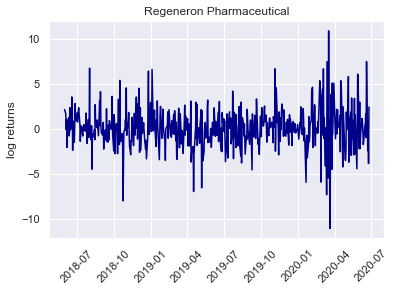

In [48]:
plt.plot(stocks['date'], stocks['regn'], color = 'darkblue')
#plt.xlabel('date')
plt.xticks(rotation = 45)
plt.ylabel('log returns')
plt.title('Regeneron Pharmaceutical')

Text(0.5, 1.0, 'West Pharmaceutical')

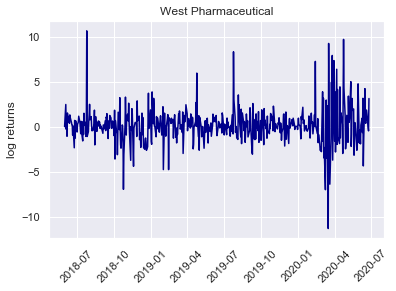

In [43]:
plt.plot(stocks['date'], stocks['wst'], color = 'darkblue')
#plt.xlabel('date')
plt.xticks(rotation = 45)
plt.ylabel('log returns')
plt.title('West Pharmaceutical')

Text(0.5, 1.0, 'ServiceNow')

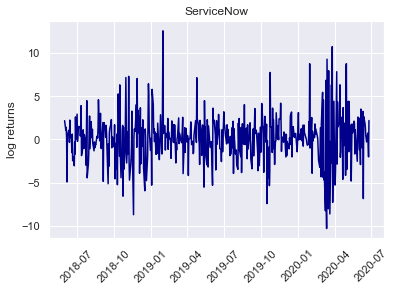

In [41]:
plt.plot(stocks['date'], stocks['now'], color = 'darkblue')
#plt.xlabel('date')
plt.xticks(rotation = 45)
plt.ylabel('log returns')
plt.title('ServiceNow')

## Question 1
 Make a time series plots of your returns and compute basic descriptive statistics. Compute the unconditional correlation matrix.

In [70]:
mean = stocks.mean()
variance = stocks.var()
skewness = stocks.skew()
kurtosis = stocks.kurt()

print('mean:') 
print(mean) 
print(' ')
print('variance:')
print(variance)
print(' ')
print('skewness:')
print(skewness)
print(' ')
print('kurtosis:')
print(kurtosis)

mean:
regn    0.139118
wst     0.170049
now     0.156615
dtype: float64
 
variance:
regn    5.197534
wst     3.843413
now     7.842103
dtype: float64
 
skewness:
regn    0.121018
wst     0.540460
now     0.167842
dtype: float64
 
kurtosis:
regn    2.901803
wst     7.209204
now     2.322867
dtype: float64


#### Comment


In [ ]:
sm.graphics.tsa.plot_acf(stock['log_returns'])
plt.title('Autocorrelation for sentiment scores')
plt.show()

sm.graphics.tsa.plot_pacf(log_returns['log_returns'])
plt.title('Autocorrelation for sentiment scores')
plt.show()

## Question 2
Make bivariate scatterplots for the three pairs of assets.

#### Comment: 


## Question 3
For each asset, estimate univariate GARCH models on the full sample with a normal innovation density.

#### Comment 


## Question 4
Estimate a DCC model with univariate GARCH speciﬁcations for the variances.

#### Comment


## Question 5 
Using plots, compare your univariate estimated variance series from the previous two questions.

#### Comment


## Question 6 
Make plots of the conditional correlation series. Interpret.

#### Comment


## ADDITIONAL 

Text(0, 0.5, 'sentiment index')

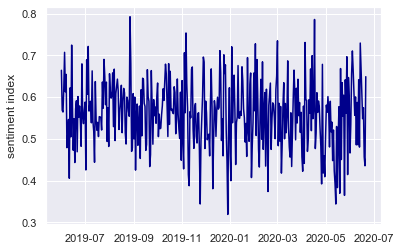

In [31]:
plt.plot(musk_day['date'],musk_day['score'], color = 'darkblue')
#plt.xlabel('date')
plt.ylabel('sentiment index')

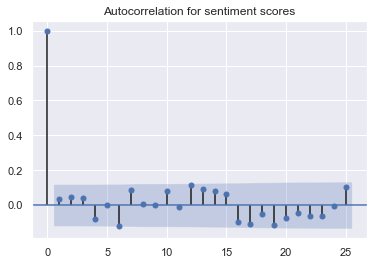

In [54]:
sm.graphics.tsa.plot_acf(log_returns['log_returns'])
plt.title('Autocorrelation for sentiment scores')
plt.show()

Text(0, 0.5, 'frequency')

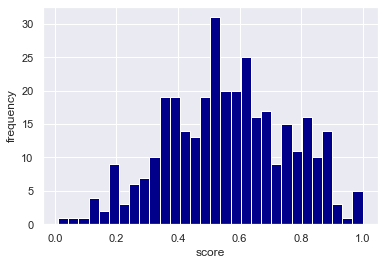

In [36]:
plt.hist(tweets_day['score'], bins = 30, color = 'darkblue')
plt.xlabel('score')
plt.ylabel('frequency')

Text(0.5, 1.0, 'ServiceNow')

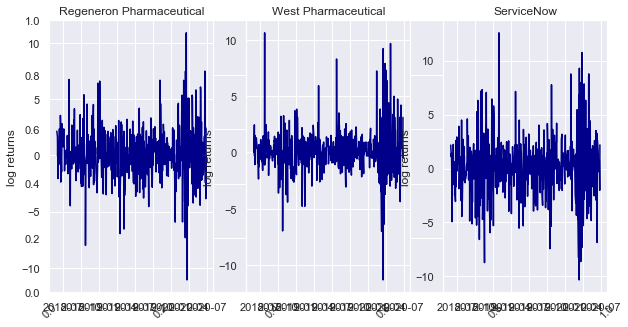

In [64]:
import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(10,5))
plt.xticks(rotation = 45)

ax1 = fig.add_subplot(gs[0, 0]) # row 0, col 0
ax1.plot(stocks['date'], stocks['regn'], color = 'darkblue')
ax1.set_ylabel('log returns')
ax1.set_title('Regeneron Pharmaceutical')

ax2 = fig.add_subplot(gs[0, 1]) # row 0, col 1
ax2.plot(stocks['date'], stocks['wst'], color = 'darkblue')
ax2.set_ylabel('log returns')
ax2.set_title('West Pharmaceutical')

ax3 = fig.add_subplot(gs[0, 2]) # row 1, span all columns
ax3.plot(stocks['date'], stocks['now'], color = 'darkblue')
ax3.set_ylabel('log returns')
ax3.set_title('ServiceNow')